# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_regimen = clean_data.groupby(["Drug Regimen"])
tumor_mean_by_regimen = grouped_by_regimen["Tumor Volume (mm3)"].mean()
tumor_median_by_regimen = grouped_by_regimen["Tumor Volume (mm3)"].median()
tumor_var_by_regimen = grouped_by_regimen["Tumor Volume (mm3)"].var()
tumor_std_by_regimen = grouped_by_regimen["Tumor Volume (mm3)"].std()
tumor_sem_by_regimen = grouped_by_regimen["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_by_regimen_df = pd.DataFrame({"Mean": tumor_mean_by_regimen,
                                    "Median": tumor_median_by_regimen,
                                    "Var": tumor_var_by_regimen,
                                    "Std": tumor_std_by_regimen,
                                    "SEM": tumor_sem_by_regimen})
stats_by_regimen_df

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_by_regiment = grouped_by_regimen.agg({
    "Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']
})
agg_stats_by_regiment

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

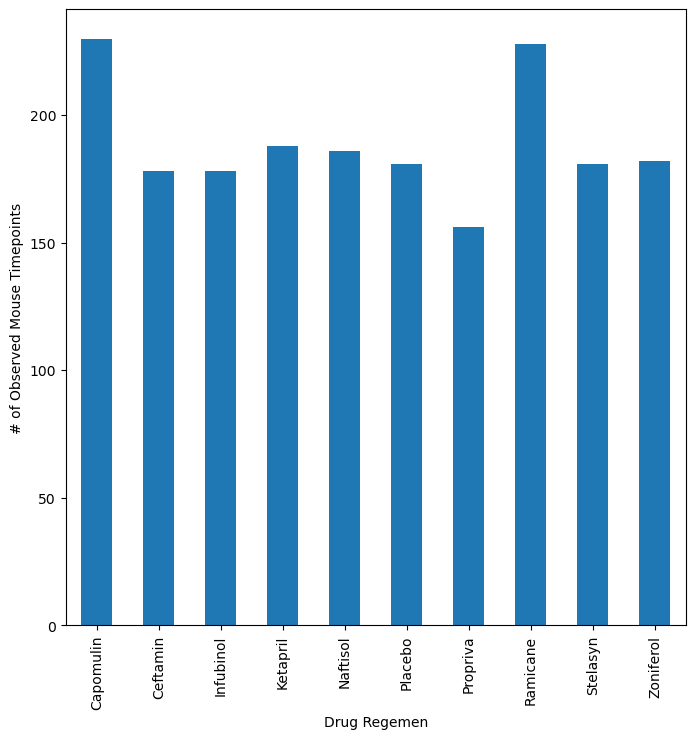

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_and_count = clean_data.groupby('Drug Regimen')
count_of_regimen = regimen_and_count["Drug Regimen"].count()
# count_of_regimen
count_chart_pd = count_of_regimen.plot(kind='bar', figsize=(8,8))
count_chart_pd.set_xlabel("Drug Regemen")
count_chart_pd.set_ylabel("# of Observed Mouse Timepoints")
plt.show()





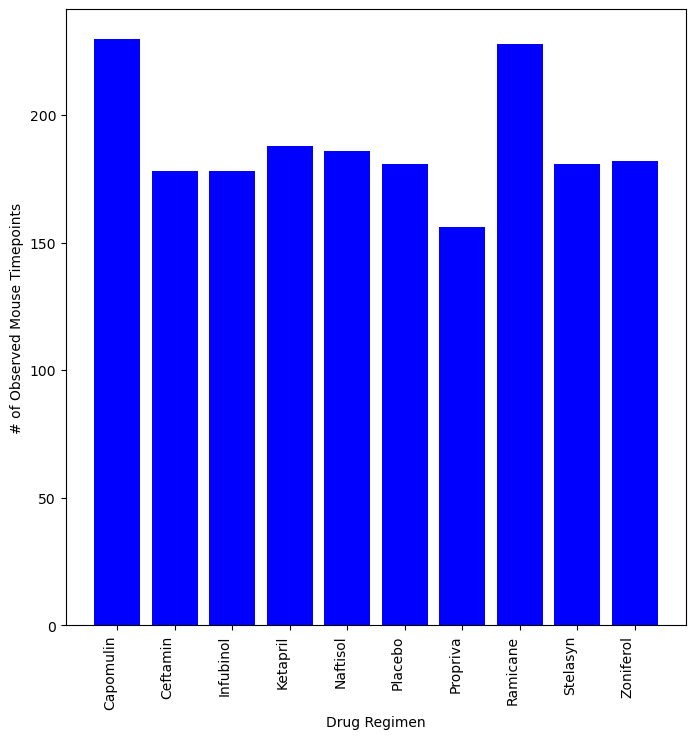

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = count_of_regimen.index


plt.figure(figsize=(8, 8))
plt.bar(drug_regimens, count_of_regimen, color='b')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha='right')

plt.show()

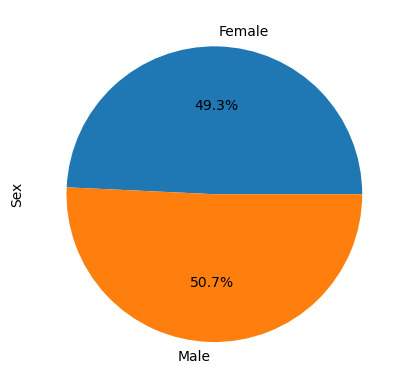

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_data.groupby('Sex')
count_of_sex = sex_count["Sex"].count()
sex_count = count_of_sex.plot(kind='pie', autopct='%1.1f%%', labels=count_of_sex.index)
sex_count.set_ylabel("Sex")
plt.show()

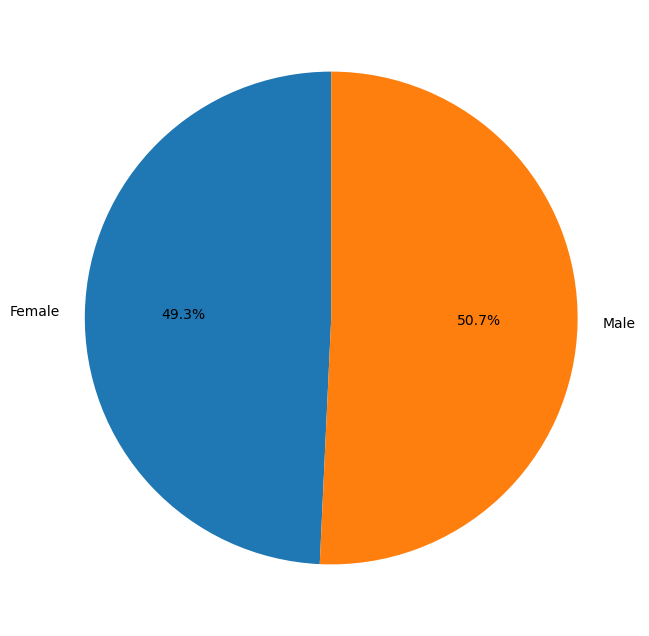

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(count_of_sex, labels=count_of_sex.index, autopct='%1.1f%%', startangle=90);


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regs = ['Capomulin', 'Ramicane', 'Infubinol' , 'Ceftamin']
# final_time = clean_data['Timepoint'].max().reset_index()
# final_tumor = pd.DataFrame(clean_data.loc[clean_data["Timepoint"] == final_time, ("Tumor Volume (mm3)","Mouse ID") ],)
# final_tumor
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
# max_time
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_time.merge(clean_data, on=("Mouse ID","Timepoint"), how="left")
merged_df
                         

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regs = ['Capomulin', 'Ramicane', 'Infubinol' , 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in drug_regs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_df[merged_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Add subset (tumor volumes) to the list for plotting purposes
    vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Identifying outliers
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Potential outliers for {regimen} regimen: {outliers}")

Potential outliers for Capomulin regimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane regimen: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol regimen: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin regimen: Series([], Name: Tumor Volume (mm3), dtype: float64)


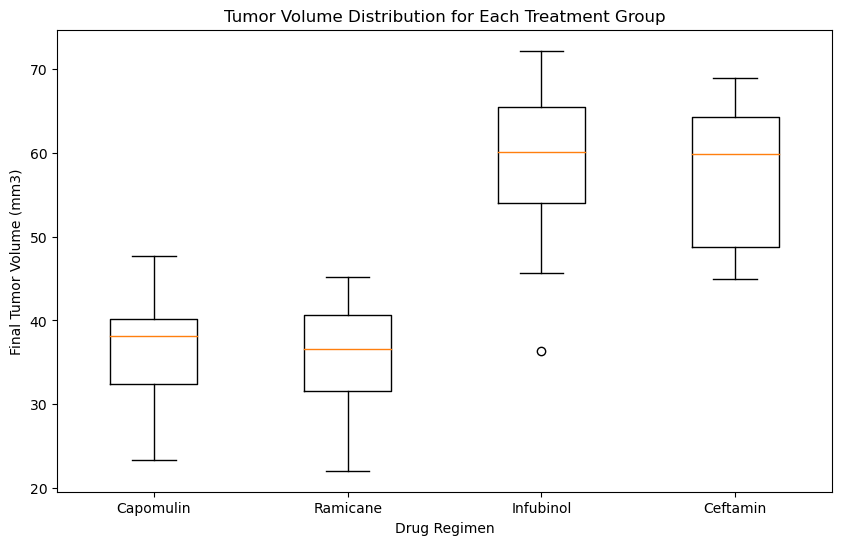

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(vol_data, labels=drug_regs)

plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
1721     l509          0           45.000000                 0    Capomulin   
1722     l509          5           45.851193                 0    Capomulin   
1723     l509         10           46.759074                 0    Capomulin   
1724     l509         15           47.488599                 1    Capomulin   
1725     l509         20           48.070452                 2    Capomulin   
1726     l509         25           44.006257                 2    Capomulin   
1727     l509         30           44.708055                 2    Capomulin   
1728     l509         35           40.207288                 2    Capomulin   
1729     l509         40           40.770813                 2    Capomulin   
1730     l509         45           41.483008                 3    Capomulin   

       Sex  Age_months  Weight (g)  
1721  Male          17          21  
1722  Male          17          21  
1723  Male         

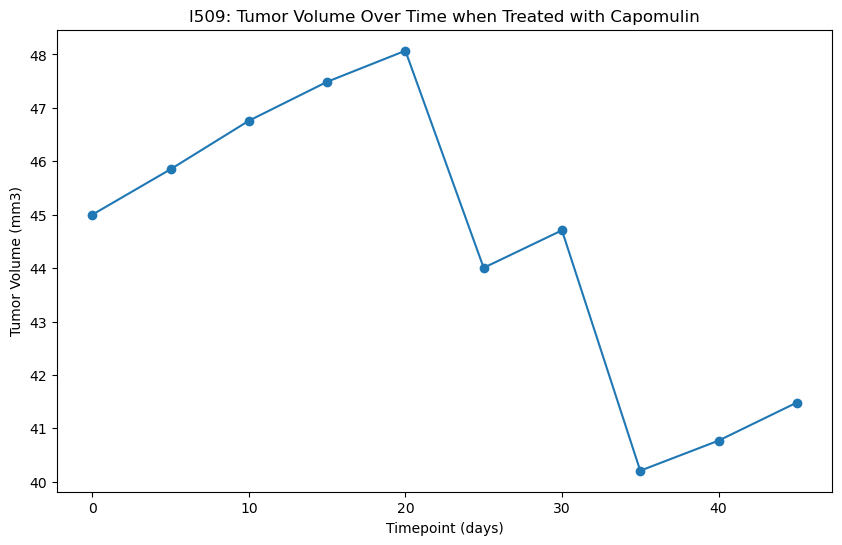

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_data[(clean_data['Mouse ID']=='l509') & (clean_data['Drug Regimen'] == 'Capomulin')]
print(mouse_l509)

plt.figure(figsize = (10,6))
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], marker='o', label ='Tumor Volume')

plt.title('l509: Tumor Volume Over Time when Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

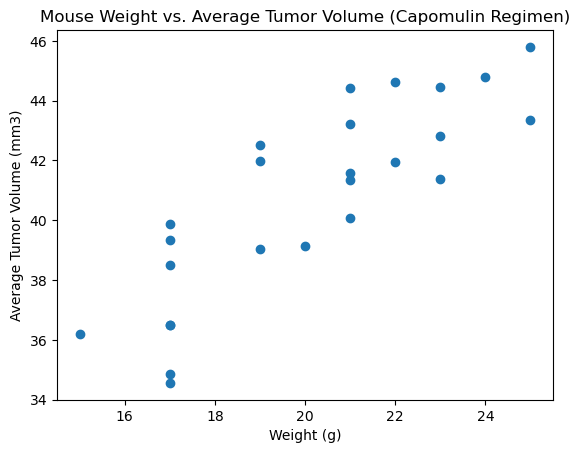

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen']== 'Capomulin']
capomulin_average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

meta_data_with_capomulin = pd.merge(capomulin_average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

plt.scatter(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


<function matplotlib.pyplot.show(close=None, block=None)>

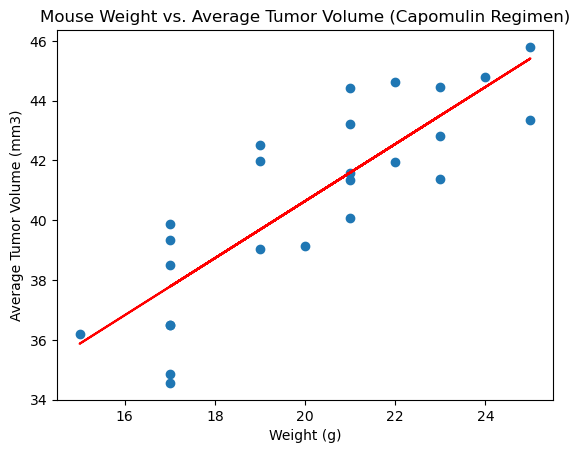

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen']== 'Capomulin']
capomulin_average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

meta_data_with_capomulin = pd.merge(capomulin_average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

plt.scatter(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])

plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation, p_value = st.pearsonr(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {correlation: .2f}")

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(meta_data_with_capomulin['Weight (g)'], meta_data_with_capomulin['Tumor Volume (mm3)'])

regression_values = meta_data_with_capomulin['Weight (g)']*slope+intercept

plt.plot(meta_data_with_capomulin['Weight (g)'], regression_values, "r-")
plt.show